In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GMM

In [54]:
fontsize = 18

def plot_points(x, ax, c):
    for xi in x:
        ax.plot([xi, xi], [0, 1], '-', c=c)
        ax.plot([xi], [1], 'o', c=c)

def format_and_save(f, ax, file_name=None):
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(0, 1.5)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_position('zero')
    ax.spines['top'].set_position('zero')
    ax.set_xticks(np.linspace(-1.5, 1.5, 5))
    ax.set_xticklabels(np.linspace(-1.5, 1.5, 5), fontsize=fontsize)
    ax.set_yticks(np.linspace(0, 1.5, 4))
    ax.set_yticklabels(['', .5, 1, 1.5], fontsize=fontsize)
    ax.set_xlabel('x', fontsize=2*fontsize)
    ax.set_ylabel(r'P(x)', fontsize=2*fontsize, rotation=0)
    ax.yaxis.set_label_coords(.5, 1.1)
    f.tight_layout()
    if file_name is not None:
        f.savefig(file_name)
        
def gmm_pdf(x, weights, means, covs):
    y = np.zeros_like(x)
    for w, m, c in zip(weights, means, covs):
        m = m[0]
        c = c[0][0]
        y += w * (1/np.sqrt(2*c*np.pi))*np.exp(-(x-m)**2/c/2.)
    return y

# Create data

In [55]:
rng = np.random.RandomState(2018)
x = np.concatenate([rng.normal(loc=-.75, scale=.25, size=7), rng.normal(loc=.75, scale=.25, size=7)])
xh = np.concatenate([rng.normal(loc=-.75, scale=.25, size=4), rng.normal(loc=.75, scale=.25, size=4)])
xx = np.linspace(-2, 2, 1000)

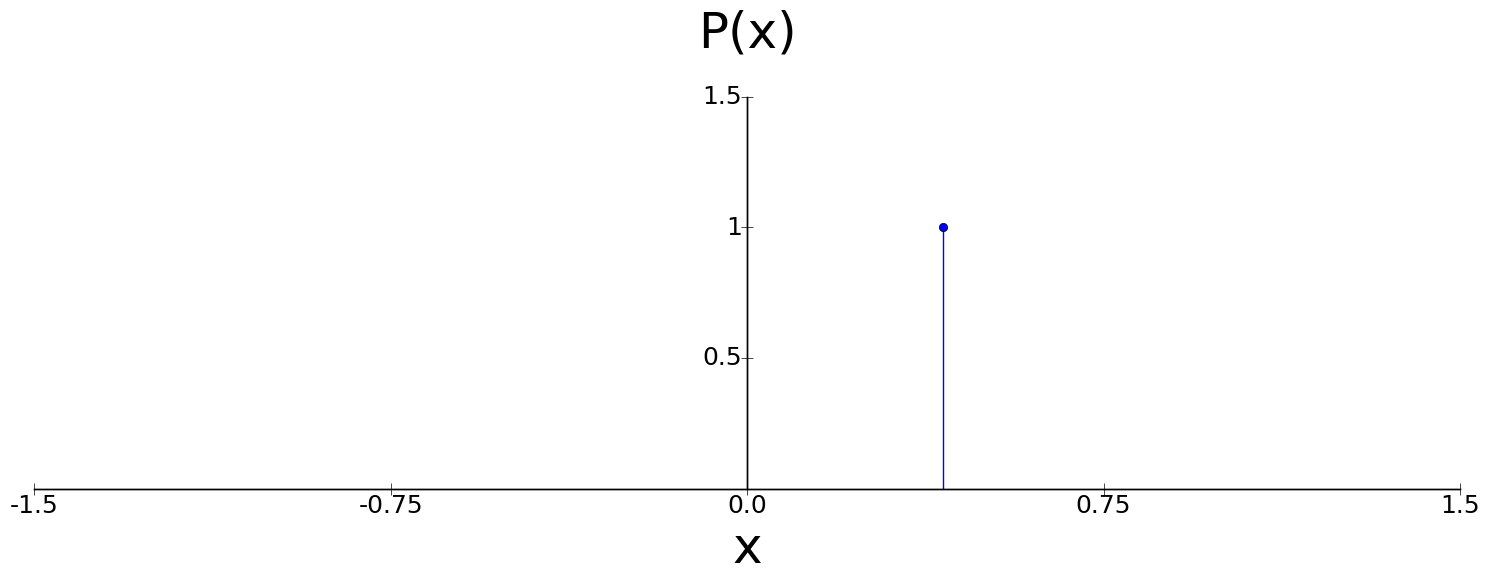

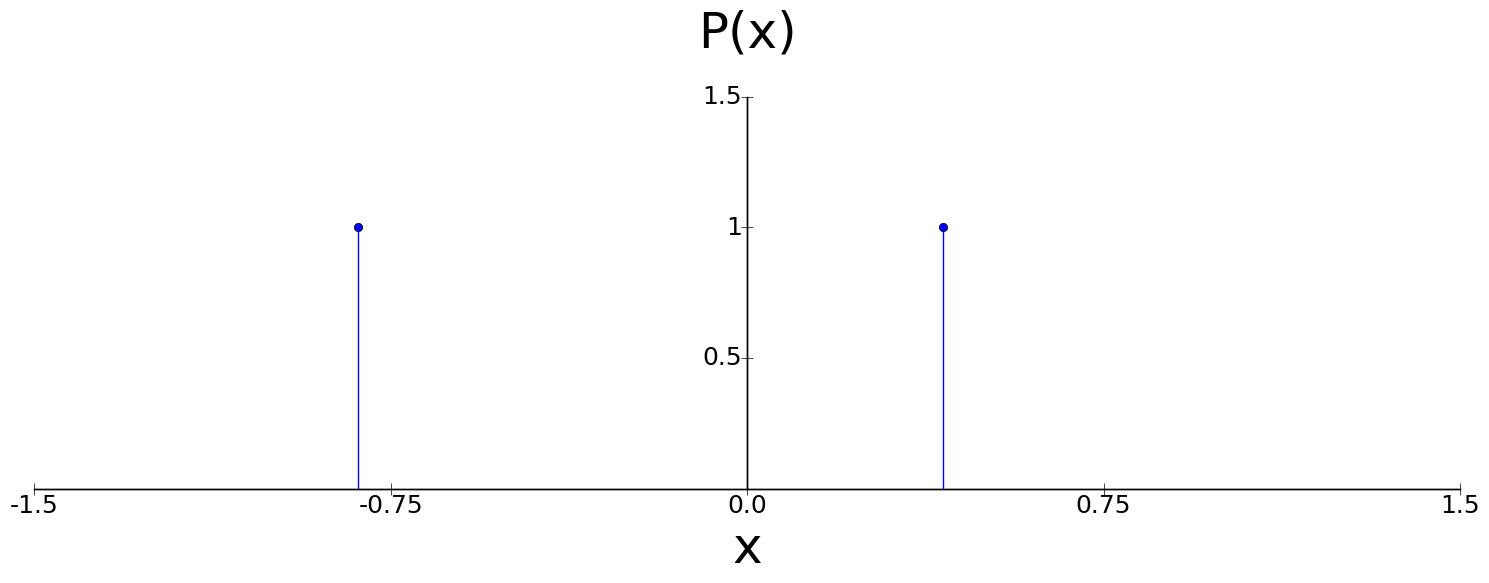

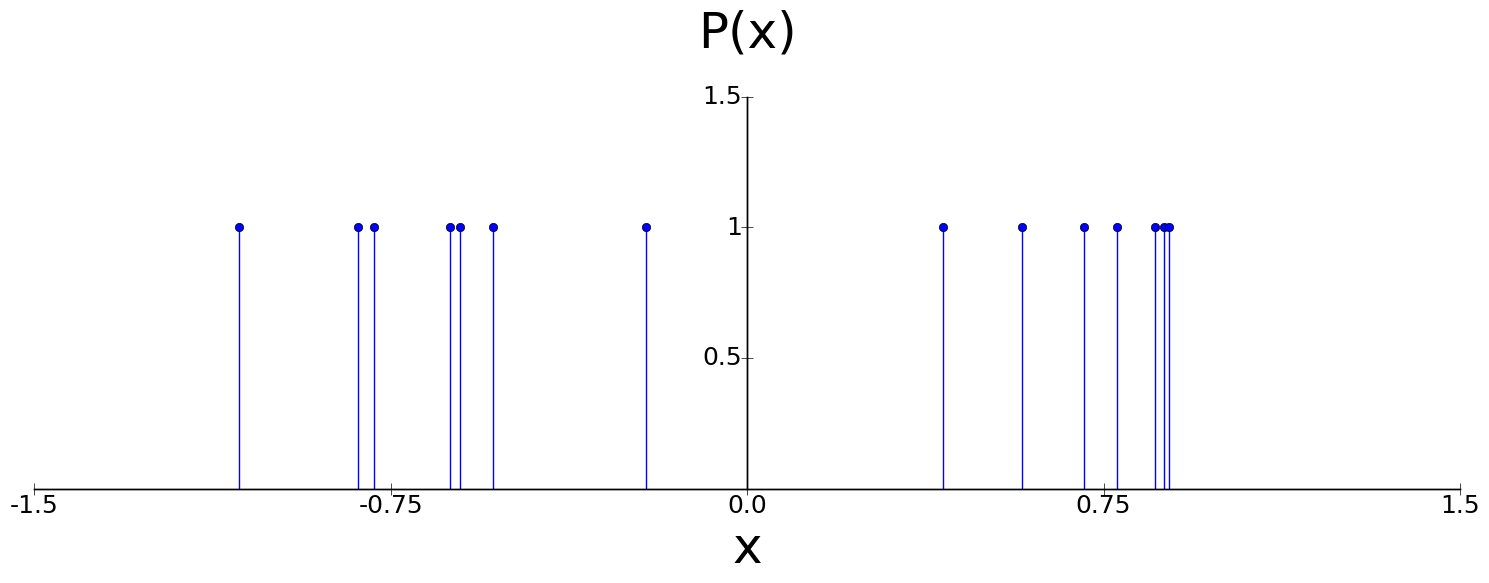

In [56]:
xp = rng.permutation(x)
for n in range(1, 3):
    f, ax = plt.subplots(1, figsize=(15, 6))
    plot_points(xp[:n], ax, 'b')
    format_and_save(f, ax)

f, ax = plt.subplots(1, figsize=(15, 6))
plot_points(x, ax, 'b')
format_and_save(f, ax)
plt.show()

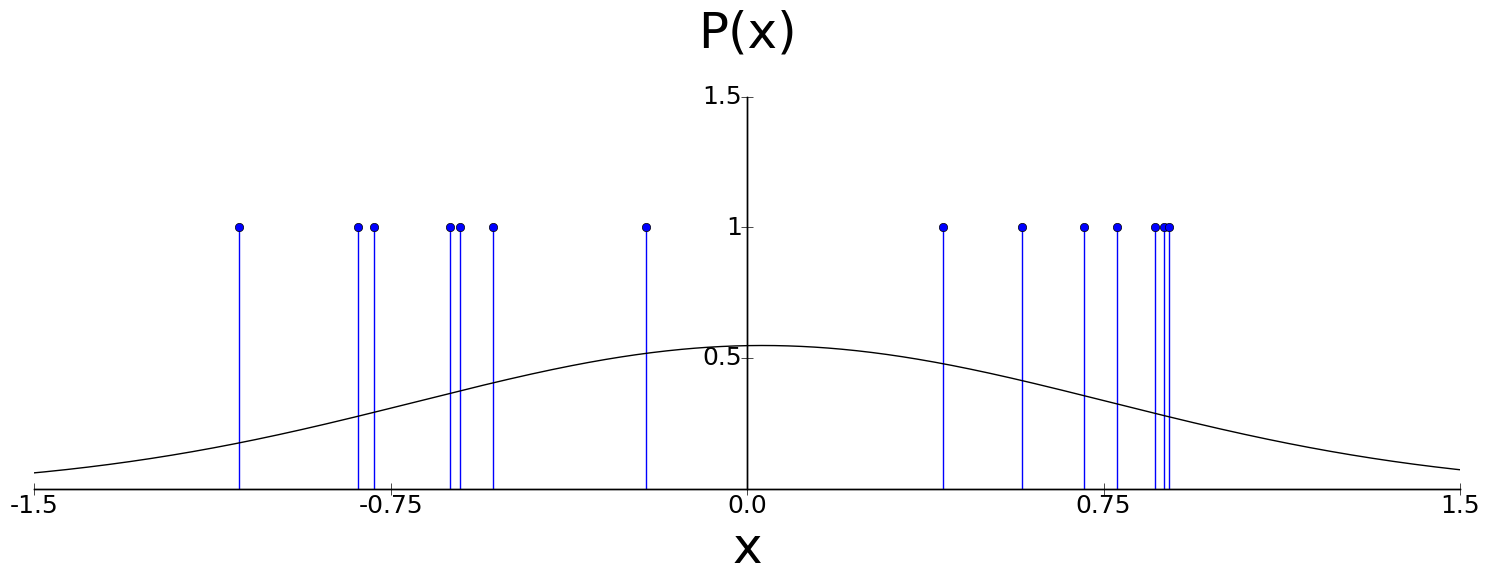

In [57]:
f, ax = plt.subplots(1, figsize=(15, 6))
plot_points(x, ax, 'b')
m = GMM(1, covariance_type='full')
m.fit(x[:, np.newaxis])
yy1 = gmm_pdf(xx, m.weights_, m.means_, m.covars_)
plt.plot(xx, yy1, '-', c='black')
format_and_save(f, ax)
plt.show()

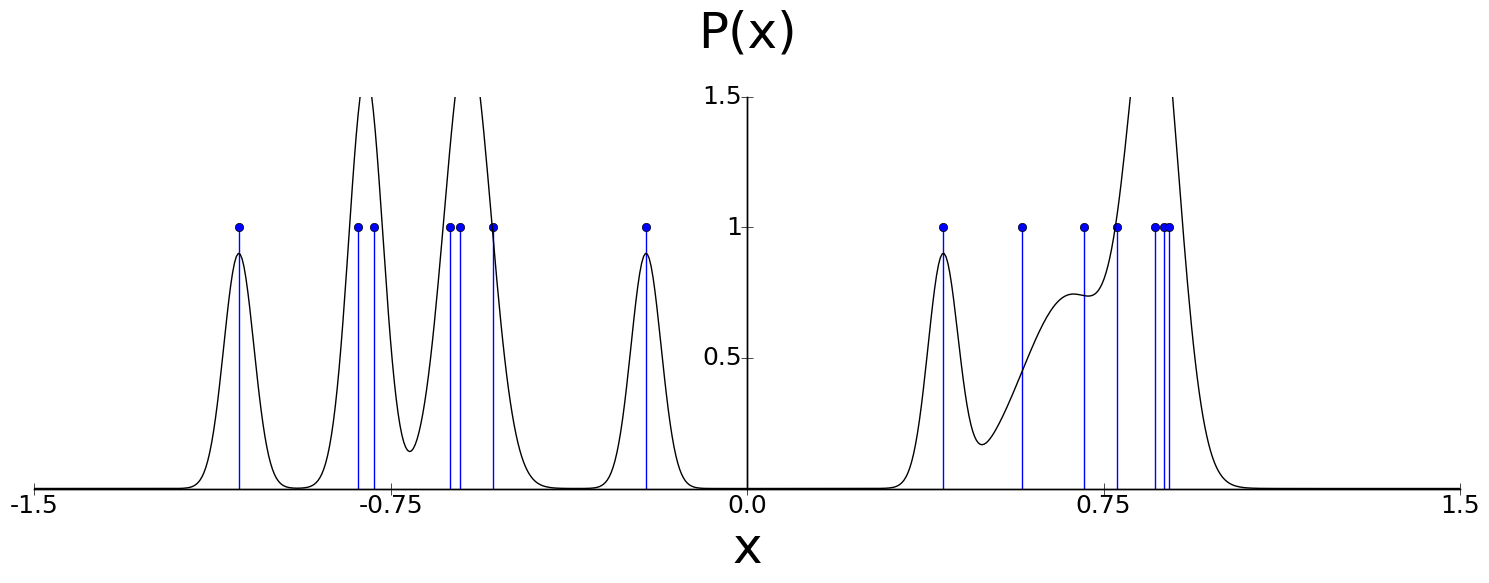

In [58]:
f, ax = plt.subplots(1, figsize=(15, 6))
plot_points(x, ax, 'b')
m = GMM(12, covariance_type='full')
m.fit(x[:, np.newaxis])
yy12 = gmm_pdf(xx, m.weights_, m.means_, m.covars_)
plt.plot(xx, yy12, '-', c='black')
format_and_save(f, ax)
plt.show()

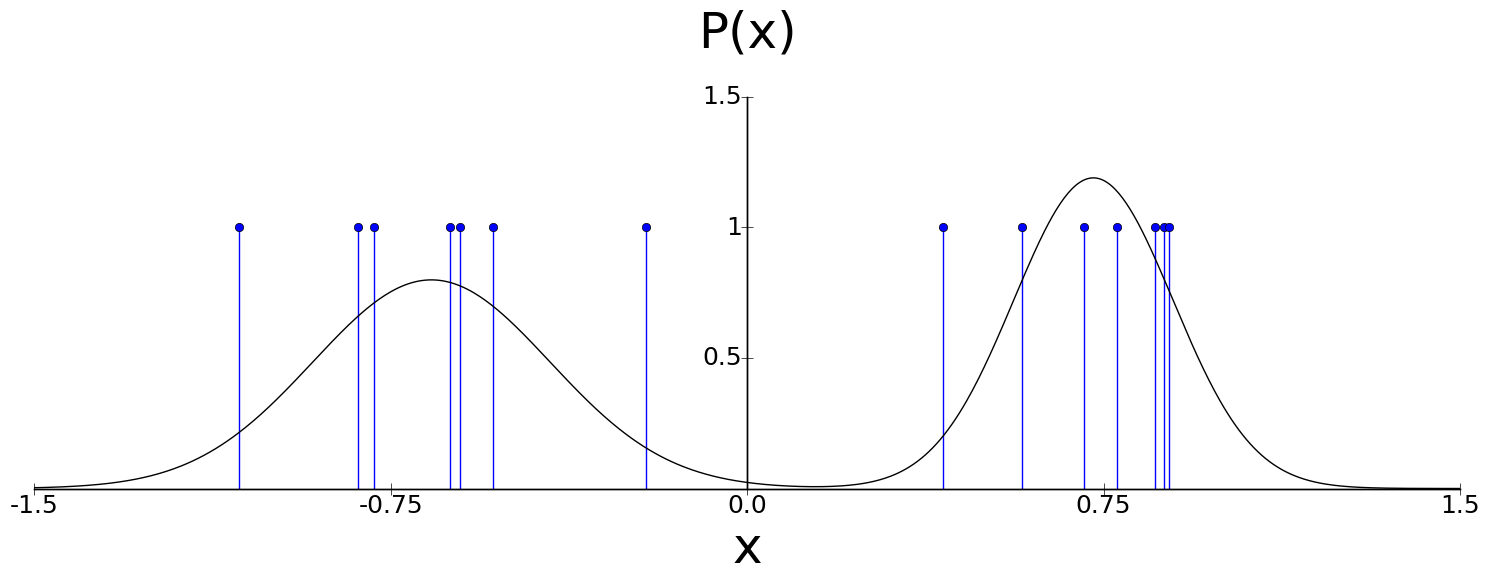

In [59]:
f, ax = plt.subplots(1, figsize=(15, 6))
plot_points(x, ax, 'b')
m = GMM(2, covariance_type='full')
m.fit(x[:, np.newaxis])
yy2 = gmm_pdf(xx, m.weights_, m.means_, m.covars_)
plt.plot(xx, yy2, '-', c='black')
format_and_save(f, ax)
plt.show()

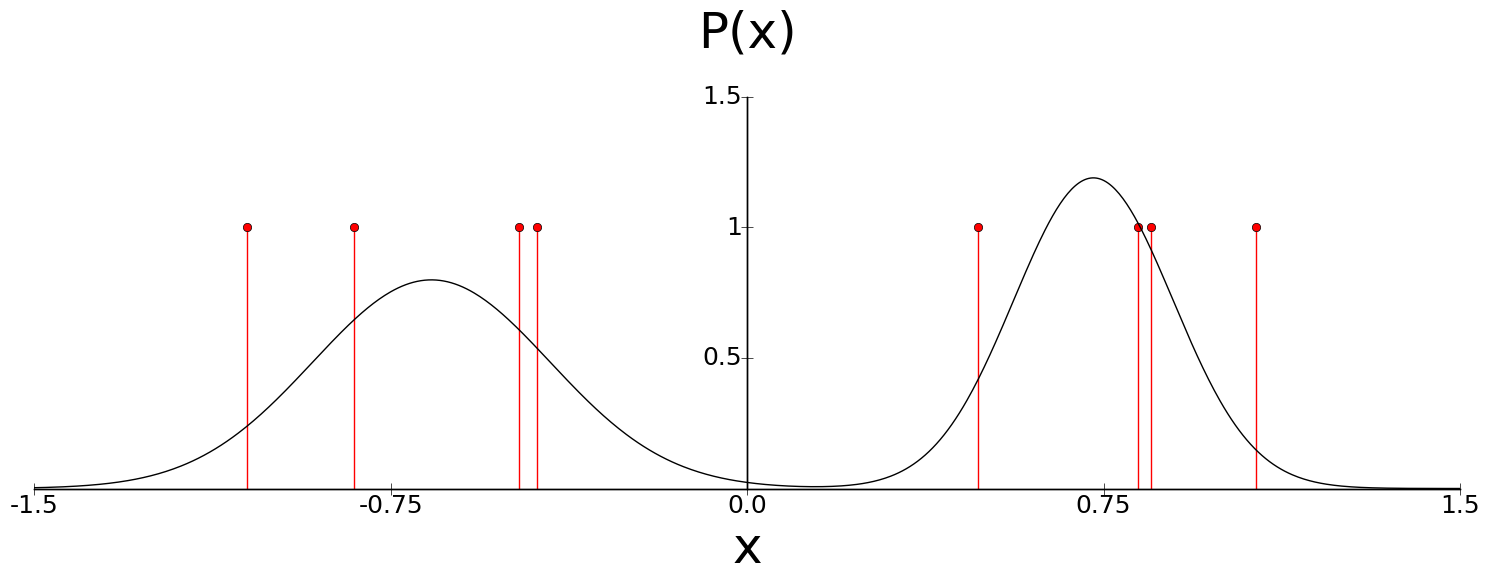

In [60]:
f, ax = plt.subplots(1, figsize=(15, 6))
plot_points(xh, ax, 'r')
plt.plot(xx, yy2, '-', c='black')
format_and_save(f, ax)
plt.show()

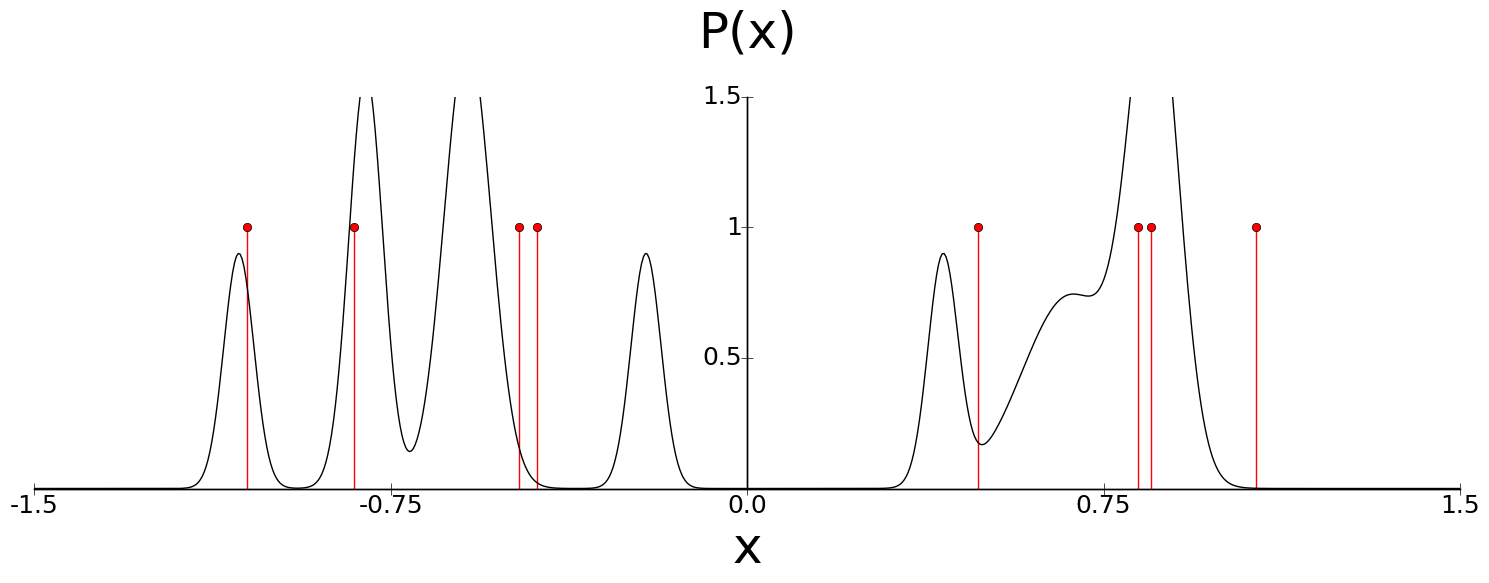

In [61]:
f, ax = plt.subplots(1, figsize=(15, 6))
plot_points(xh, ax, 'r')
plt.plot(xx, yy12, '-', c='black')
format_and_save(f, ax)
plt.show()

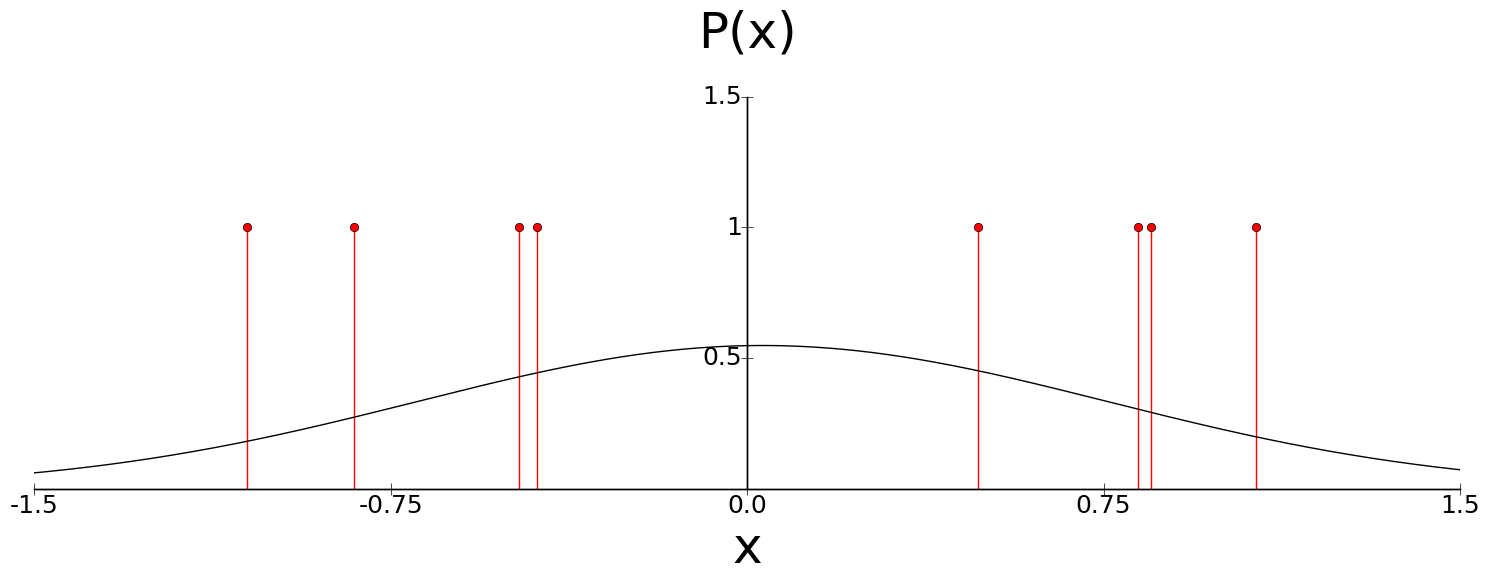

In [62]:
f, ax = plt.subplots(1, figsize=(15, 6))
plot_points(xh, ax, 'r')
plt.plot(xx, yy1, '-', c='black')
format_and_save(f, ax)
plt.show()

# Conditional bars

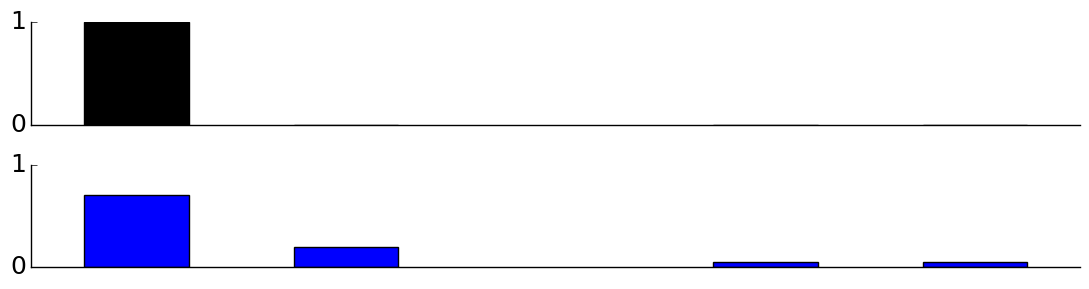

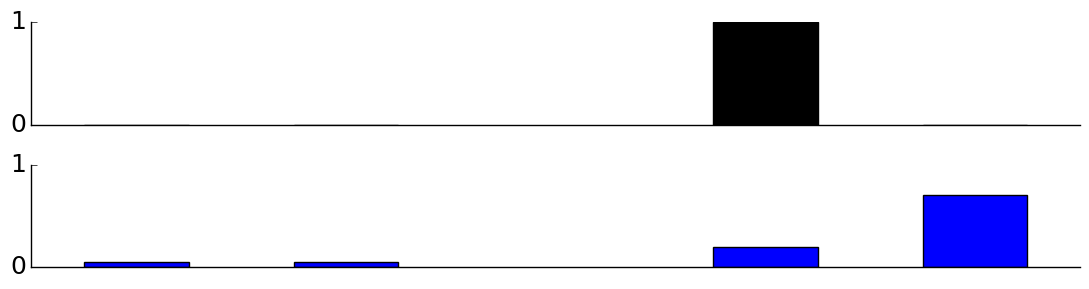

In [27]:
x = [0, 1, 3, 4]
ys = [[1, 0, 0, 0],
      [0, 0, 1, 0]]
yhs = [[.7, .2, .05, .05],
       [.05, .05, .2, .7]]
width = .5

for ii, (y, yh) in enumerate(zip(ys, yhs)):
    f, [ax1, ax2] = plt.subplots(2, figsize=(11, 3))
    ax1.bar(x, y, width=width, color='black')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_xlim([-.25, 4.75])
    ax1.set_xticks([])
    ax1.set_xticklabels([])
    ax1.set_yticks([0, 1])
    ax1.set_yticklabels([0, 1], fontsize=18)

    ax2.bar(x, yh, width=width)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    ax2.set_xlim([-.25, 4.75])
    ax2.set_xticks([])
    ax2.set_xticklabels([])
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels([0, 1], fontsize=18)
    f.tight_layout()
plt.show()